In [ ]:
from keras.datasets import cifar10

In [ ]:
import numpy as np

In [ ]:
# Loading dataset
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

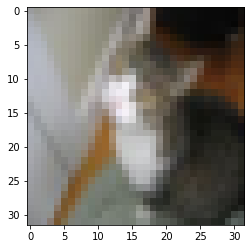

In [ ]:
plt.imshow(X_train[101])

In [ ]:
y_train[101]

array([3], dtype=uint8)

In [ ]:
# Pre-processing: convert 0-255 -> 0 - 1 for all 3 color channels for train and test set
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape,Conv2D,Dropout,Conv2DTranspose,BatchNormalization,GaussianNoise
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
# lambda value
weight_decay = 0.0001

In [ ]:
# Creating the encoder 
encoder = Sequential()

encoder.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2,kernel_regularizer=regularizers.l2(weight_decay),input_shape=(32,32,3)))
encoder.add(BatchNormalization())

encoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2,kernel_regularizer=regularizers.l2(weight_decay)))
encoder.add(BatchNormalization())

In [ ]:
# Creating the decoder
decoder = Sequential()

decoder.add(Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
decoder.add(BatchNormalization())

decoder.add(Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))

In [ ]:
# Creating the autoencoder
autoencoder = Sequential([encoder,decoder])

In [ ]:
# Summary of the autoencoder
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 8, 8, 64)          78144     
_________________________________________________________________
sequential_3 (Sequential)    (None, 32, 32, 3)         115011    
Total params: 193,155
Trainable params: 192,387
Non-trainable params: 768
_________________________________________________________________


In [ ]:
# Summary of the encoder
autoencoder.layers[0].summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 16, 16, 128)       3584      
_________________________________________________________________
batch_normalization_14 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          73792     
_________________________________________________________________
batch_normalization_15 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
batch_normalization_16 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
batch_normalization_17 (Batc (None, 8, 8, 64)          256       
Total params: 78,656
Trainable params: 78,016
Non-trainable params: 640
________________________________________________

In [ ]:
# Summary of the decoder
autoencoder.layers[1].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_7 (Conv2DTr (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 3)         3459      
Total params: 114,243
Trainable params: 114,243
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss='binary_crossentropy',optimizer=Adam(0.001))

In [ ]:
autoencoder.fit(X_train,X_train,epochs=25,validation_data=(X_test,X_test))

Epoch 1/25
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5725 - val_loss: 0.5760
Epoch 2/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5548 - val_loss: 0.5578
Epoch 3/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5542 - val_loss: 0.5533
Epoch 4/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5534 - val_loss: 0.5536
Epoch 5/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5532 - val_loss: 0.5554
Epoch 6/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5527 - val_loss: 0.5542
Epoch 7/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5527 - val_loss: 0.5519
Epoch 8/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5523 - val_loss: 0.5524
Epoch 9/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5522 - val_loss: 0.5528
Epoch 10/25
1563/1563 [==============================] - 16s 10m

In [ ]:
n = 10
passed_images = autoencoder.predict(X_test[:n])

In [ ]:
cifar10_labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

	   Cat


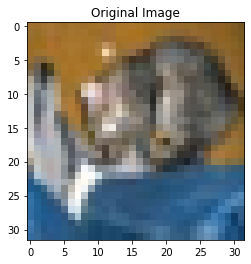

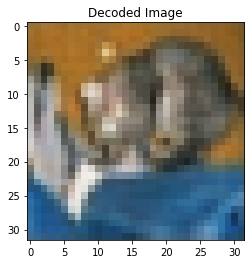

	   Ship


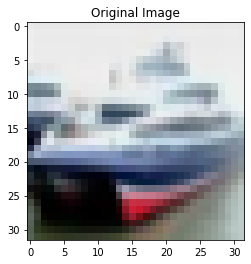

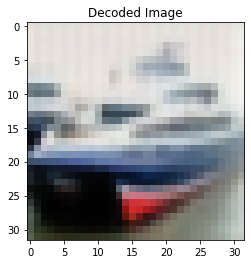

	   Ship


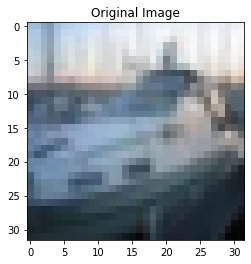

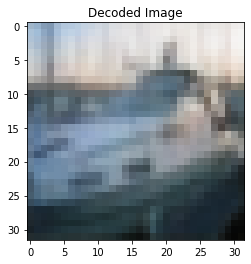

	   Airplane


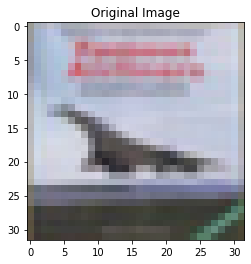

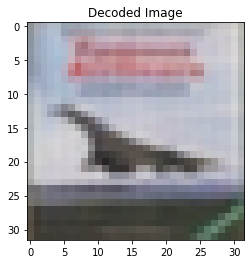

	   Frog


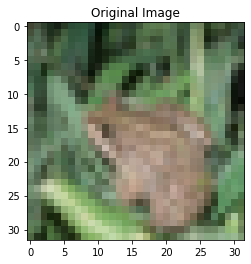

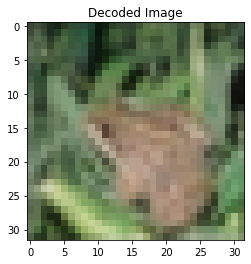

	   Frog


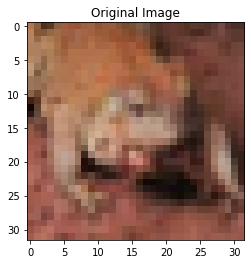

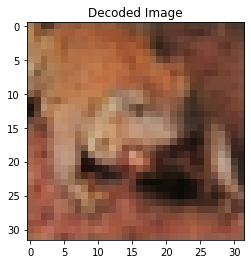

	   Automobile


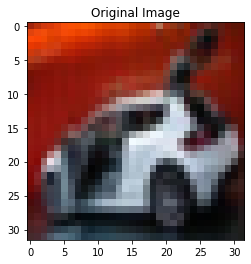

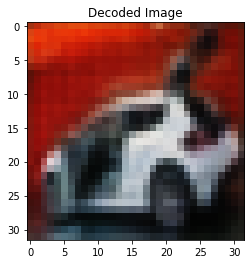

	   Frog


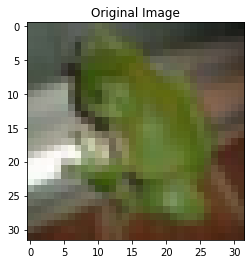

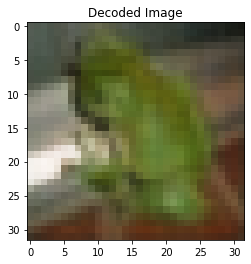

	   Cat


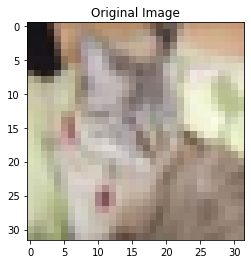

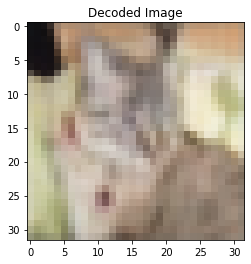

	   Automobile


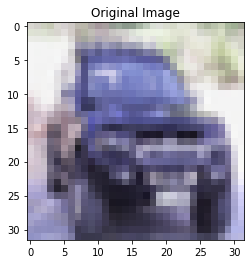

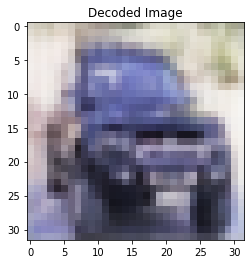

In [ ]:
for i in range(n):
  print('================================')
  print('\t  ',cifar10_labels[y_test[i][0]])
  print('================================')

  plt.imshow(X_test[i].reshape(32,32,3))
  plt.title('Original Image')
  plt.show()

  plt.imshow(passed_images[i].reshape(32,32,3))
  plt.title('Decoded Image')
  plt.show()

In [ ]:
# =======================================Creating an autoencoder to remove noise===============================

In [ ]:
# How much noise to put in each image
noise_factor = 0.1

In [ ]:
# Applying noise
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0,size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0,size=X_test.shape)

# Making sure all values fall between 0 and 1
X_test_noisy = np.clip(X_test_noisy,0., 1.)
X_train_noisy = np.clip(X_train_noisy,0., 1.)

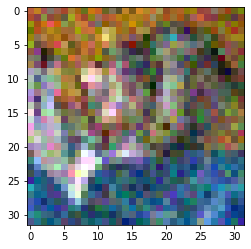

In [ ]:
# Image with added noise
plt.imshow(X_test_noisy[0])

In [ ]:
# Creating the encoder 
encoder = Sequential()

encoder.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2,kernel_regularizer=regularizers.l2(weight_decay),input_shape=(32,32,3)))
encoder.add(BatchNormalization())

encoder.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2,kernel_regularizer=regularizers.l2(weight_decay)))
encoder.add(BatchNormalization())

In [ ]:
# Creating the decoder
decoder = Sequential()

decoder.add(Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
decoder.add(BatchNormalization())

decoder.add(Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
decoder.add(BatchNormalization())

decoder.add(Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same',kernel_regularizer=regularizers.l2(weight_decay)))

In [ ]:
# Creating the noise remover
noise_remover = Sequential([encoder,decoder])

In [ ]:
noise_remover.compile(loss='binary_crossentropy',optimizer=Adam(0.001))

In [ ]:
noise_remover.fit(X_train_noisy,X_train,epochs=30,validation_data=(X_test_noisy,X_test))

Epoch 1/30
1563/1563 [==============================] - 51s 11ms/step - loss: 0.5781 - val_loss: 0.5587
Epoch 2/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5567 - val_loss: 0.5554
Epoch 3/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5556 - val_loss: 0.5636
Epoch 4/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5555 - val_loss: 0.5644
Epoch 5/30
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5555 - val_loss: 0.6198
Epoch 6/30
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5552 - val_loss: 0.5567
Epoch 7/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5541 - val_loss: 0.5731
Epoch 8/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5545 - val_loss: 0.5546
Epoch 9/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5540 - val_loss: 0.5544
Epoch 10/30
1563/1563 [==============================] - 17s 11m

In [ ]:
noisey_images = X_test_noisy[:10]
denoised = noise_remover(noisey_images)

	   Cat
Original image


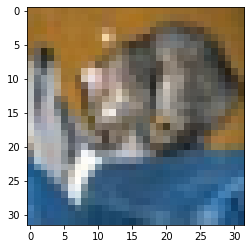

Image with noise


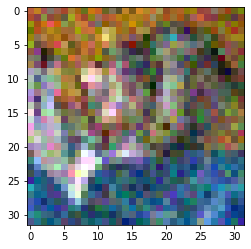

Image with noise removed


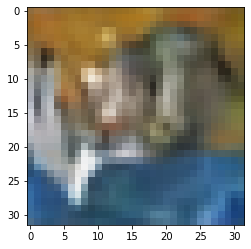

	   Ship
Original image


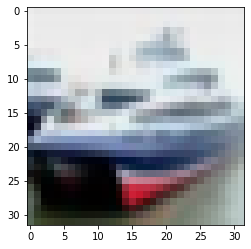

Image with noise


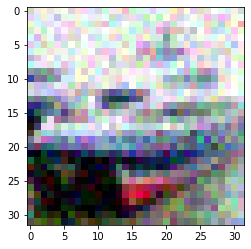

Image with noise removed


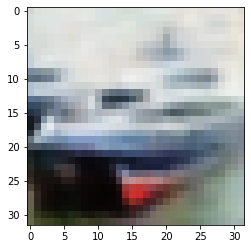

	   Ship
Original image


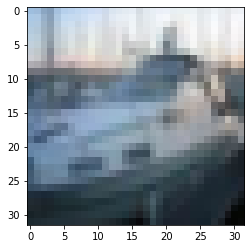

Image with noise


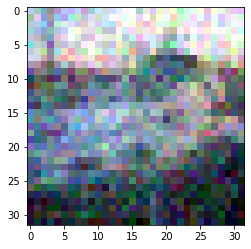

Image with noise removed


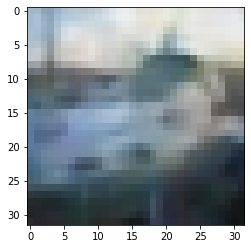

	   Airplane
Original image


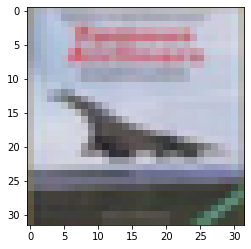

Image with noise


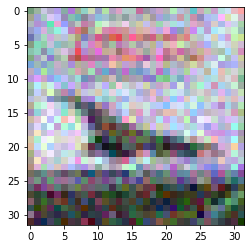

Image with noise removed


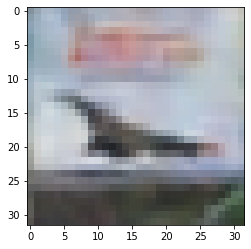

	   Frog
Original image


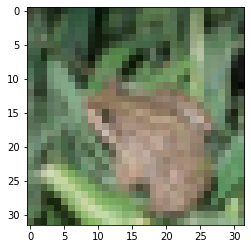

Image with noise


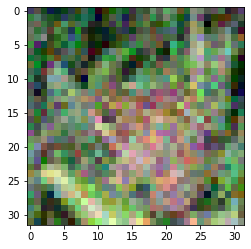

Image with noise removed


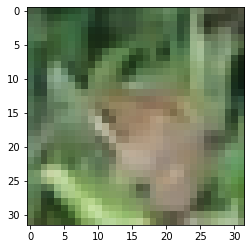

	   Frog
Original image


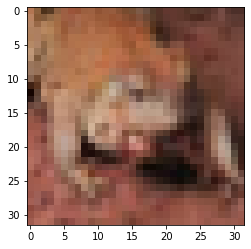

Image with noise


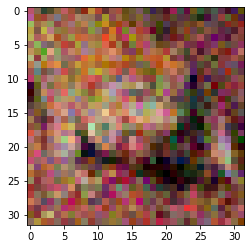

Image with noise removed


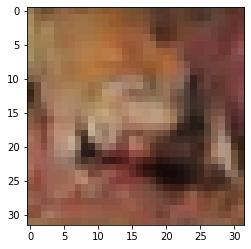

	   Automobile
Original image


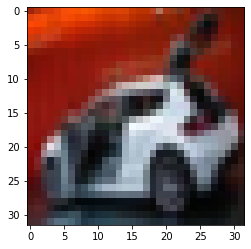

Image with noise


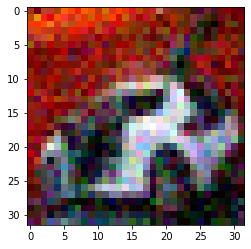

Image with noise removed


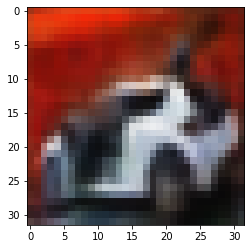

	   Frog
Original image


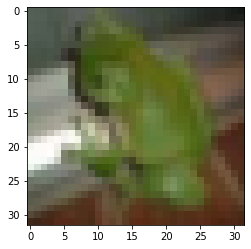

Image with noise


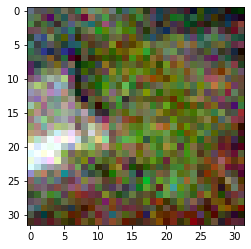

Image with noise removed


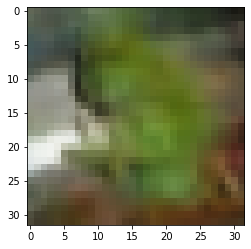

	   Cat
Original image


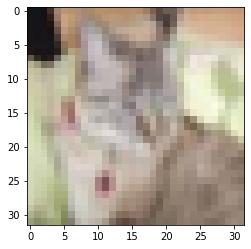

Image with noise


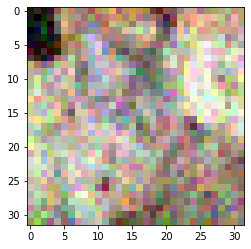

Image with noise removed


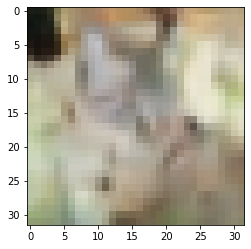

	   Automobile
Original image


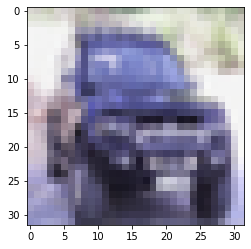

Image with noise


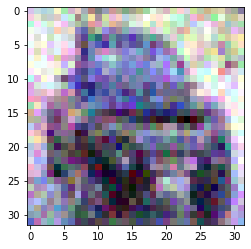

Image with noise removed


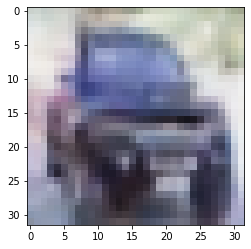

In [ ]:
i = 0
for i in range(10):
  print('================================')
  print('\t  ',cifar10_labels[y_test[i][0]])
  print('================================')

  print("Original image")
  plt.imshow(X_test[i],cmap='gray')
  plt.show()

  print("Image with noise")
  plt.imshow(noisey_images[i])  
  plt.show()

  print("Image with noise removed")
  plt.imshow(denoised[i])
  plt.show()